ML-Clustering 

https://github.com/lucas-de-sa/national-anthems-clustering/blob/master/Cluster_Anthems.ipynb

In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
%matplotlib inline
plt.style.use('ggplot')


In [2]:

import plotly.express as px
import plotly.graph_objects as go

In [3]:
from __future__ import print_function
from sklearn.cluster import KMeans

In [208]:
import seaborn            as sns

In [4]:
recipes = pd.read_csv('dataset/full_dataset.csv')

In [5]:
recipes.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [6]:
recipes.shape

(2231142, 7)

In [7]:
recipes[['directions']][0:10]

,directions
0,"[""In a heavy 2-quart saucepan, mix brown sugar..."
1,"[""Place chipped beef on bottom of baking dish...."
2,"[""In a slow cooker, combine all ingredients. C..."
3,"[""Boil and debone chicken."", ""Put bite size pi..."
4,"[""Combine first four ingredients and press in ..."
5,"[""Wash potatoes; prick several times with a fo..."
6,"[""Cream sugar and butter."", ""Add egg and beat ..."
7,"[""Mix together both cans of corn, crackers, eg..."
8,"[""Roll steak strips in flour."", ""Brown in skil..."
9,"[""Empty Cool Whip into a bowl."", ""Drain juice ..."


In [8]:
recipes['title'][0]

'No-Bake Nut Cookies'

In [9]:
recipes['NER'][0]

'["brown sugar", "milk", "vanilla", "nuts", "butter", "bite size shredded rice biscuits"]'

In [10]:
recipes['ingredients'][0]

'["1 c. firmly packed brown sugar", "1/2 c. evaporated milk", "1/2 tsp. vanilla", "1/2 c. broken nuts (pecans)", "2 Tbsp. butter or margarine", "3 1/2 c. bite size shredded rice biscuits"]'

In [11]:
recipes['directions'][0]

'["In a heavy 2-quart saucepan, mix brown sugar, nuts, evaporated milk and butter or margarine.", "Stir over medium heat until mixture bubbles all over top.", "Boil and stir 5 minutes more. Take off heat.", "Stir in vanilla and cereal; mix well.", "Using 2 teaspoons, drop and shape into 30 clusters on wax paper.", "Let stand until firm, about 30 minutes."]'

Trying to create a Document Term Matrix from NER column

In [12]:
from sklearn.feature_extraction.text import CountVectorizer


In [14]:
cv=CountVectorizer(tokenizer=lambda x: x.split(','))
data=cv.fit_transform(recipes['NER'][0:20])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=recipes[0:20].index
df_dtm.head(5)

,"""almond extract""","""applesauce""","""bacon""","""bananas""","""barbecue sauce""]","""bite size shredded rice biscuits""]","""boiling water""","""butter""","""buttermilk""","""cheddar cheese""",...,"[""frozen corn""","[""frozen strawberries""","[""peanut butter""","[""pie filling""","[""pineapple""","[""powdered sugar""","[""shell""","[""sugar""","[""taco sauce""","[""tomatoes"""
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [15]:
cv=CountVectorizer(analyzer = 'word')
data2=cv.fit_transform(recipes['NER'][0:20])
df_dtm2 = pd.DataFrame(data2.toarray(), columns=cv.get_feature_names())
df_dtm2.index=recipes[0:20].index
df_dtm2.head(5)

,ale,almond,applesauce,bacon,baking,bananas,barbecue,beef,biscuits,bite,...,taco,tomato,tomatoes,vanilla,vinegar,water,wesson,white,whole,worcestershire
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
sample = recipes.sample(frac=0.01, random_state = 1)


In [17]:
sample

,Unnamed: 0,title,ingredients,directions,link,source,NER
7964,7964,Apple Dip,"[""1 (7 oz.) jar Marshmallow Creme"", ""1 (8 oz.)...","[""Bring cream cheese to room temperature. Mix ...",www.cookbooks.com/Recipe-Details.aspx?id=980881,Gathered,"[""Marshmallow Creme"", ""cream cheese""]"
1765246,1765246,Wasabi Whipped Potatoes,"[""1 1/2 lb. russet or Yukon gold potatoes, pee...","[""Place potatoes in large saucepan, cover with...",www.vegetariantimes.com/recipe/wasabi-whipped-...,Recipes1M,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p..."
677031,677031,Caramel Breakfast Rolls,"[""2 (1 lb.) loaves frozen bread dough, thawed""...","[""Cut 1 loaf of bread into small pieces; place...",www.cookbooks.com/Recipe-Details.aspx?id=537560,Gathered,"[""bread"", ""brown sugar"", ""regular vanilla pudd..."
1325712,1325712,Egg And Sausage Muffins,"[""1/4 cup cream (half & half)"", ""12 large eggs...","[""Preheat oven to 350 \u00b0F (175 \u00b0C). S...",www.epicurious.com/recipes/member/views/egg-an...,Gathered,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus..."
294137,294137,Taco Soup,"[""2 lb. lean ground beef"", ""1 small onion, cho...","[""Brown ground beef and onions; drain fat."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=288957,Gathered,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne..."
...,...,...,...,...,...,...,...
1921219,1921219,Spring Rolls with Asian Chili-Lime Dipping Sauce,"[""Rice paper"", ""Bowl of warm water"", ""Sprouts""...","[""Dip rice paper into warm water to soften."", ...",www.foodnetwork.com/recipes/spring-rolls-with-...,Recipes1M,"[""paper"", ""water"", ""Sprouts"", ""carrots"", ""cabb..."
714787,714787,Marlene'S Meat Loaf & Tomato Gravy,"[""2 lb. ground beef"", ""1 medium onion, chopped...","[""Combine all ingredients, except bacon."", ""Sh...",www.cookbooks.com/Recipe-Details.aspx?id=6656,Gathered,"[""ground beef"", ""onion"", ""eggs"", ""bread"", ""sal..."
1826908,1826908,Tuna Casserole,"[""1 12 cups dry elbow macaroni"", ""14 cup Itali...","[""1."", ""Cook noodles to al dente in boiling sa...",www.food.com/recipe/tuna-casserole-412249,Recipes1M,"[""macaroni"", ""Italian seasoned breadcrumbs"", ""..."
786225,786225,Peanut Brittle,"[""1 c. sugar"", ""1 c. raw peanuts"", ""1/2 c. Kar...","[""Cook sugar, raw peanuts and Karo syrup for 4...",www.cookbooks.com/Recipe-Details.aspx?id=703425,Gathered,"[""sugar"", ""peanuts"", ""syrup"", ""oleo"", ""vanilla..."


In [18]:
title_ing = sample[['title', 'NER']]

In [19]:
title_ing.head()

,title,NER
7964,Apple Dip,"[""Marshmallow Creme"", ""cream cheese""]"
1765246,Wasabi Whipped Potatoes,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p..."
677031,Caramel Breakfast Rolls,"[""bread"", ""brown sugar"", ""regular vanilla pudd..."
1325712,Egg And Sausage Muffins,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus..."
294137,Taco Soup,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne..."


In [41]:
cv=CountVectorizer(analyzer = 'word')
data_pca=cv.fit_transform(title_ing['NER'][0:100])
df_dtm_pca = pd.DataFrame(data_pca.toarray(), columns=cv.get_feature_names())
df_dtm_pca.index=title_ing[0:100].index
df_dtm_pca.head(5)

,active,ale,all,allspice,almond,almonds,alum,apples,applesauce,asparagus,...,whites,whole,wild,wine,worcestershire,yeast,yellow,yogurt,zest,zucchini
7964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1765246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
677031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1325712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
kmeans = KMeans()

In [52]:
kmeans.set_params(n_clusters=3)
kmeans.fit(df_dtm_pca)

KMeans(n_clusters=3)

In [53]:
kmeans.cluster_centers_

array([[ 2.94117647e-02, -3.46944695e-18,  5.88235294e-02, ...,
         2.94117647e-02, -3.46944695e-18, -3.46944695e-18],
       [-5.20417043e-18,  1.53846154e-02, -1.04083409e-17, ...,
         1.53846154e-02,  1.53846154e-02,  1.53846154e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [54]:
kmeans.labels_

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [58]:
# plt.scatter(df_dtm_pca[:, 0], df_dtm_pca[:,1], df_dtm_pca[:,2], c=kmeans.labels_, alpha=0.8, s=50)
# plt.scatter(
#      kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 1],
#      marker="+", s=1000)

In [242]:
temp = sample['NER']

In [243]:
temp[0:10]

7964                   ["Marshmallow Creme", "cream cheese"]
1765246    ["russet", "low-fat milk", "butter", "wasabi p...
677031     ["bread", "brown sugar", "regular vanilla pudd...
1325712    ["cream", "eggs", "pepper", "salt", "pork saus...
294137     ["lean ground beef", "onion", "pintos", "kidne...
241814     ["water", "sugar", "milk powder", "salt", "sho...
1963105    ["sweet potatoes", "butter", "allspice", "nutm...
1785488    ["sugar", "white vinegar", "cinnamon", "cloves...
1293750    ["dried red kidney beans", "salt", "peanut", "...
631800     ["peanuts", "white almond bark", "chocolate ch...
Name: NER, dtype: object

In [244]:
from sklearn.feature_extraction.text  import TfidfVectorizer


In [245]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(temp)

tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)



22311 rows


,0,1,2,3,4,5,6,7,8,9,...,22301,22302,22303,22304,22305,22306,22307,22308,22309,22310
marshmallow,0.675083,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
creme,0.648600,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
cream,0.254837,0.0,0.0,0.314677,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
cheese,0.242156,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.145054,0.0,0.0,0.0,0.0,0.131871,0.0,0.0
_____,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [246]:
final_df.T.nlargest(10, 0)


,0,1,2,3,4,5,6,7,8,9,...,22301,22302,22303,22304,22305,22306,22307,22308,22309,22310
marshmallow,0.675083,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
creme,0.648600,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
cream,0.254837,0.0,0.0,0.314677,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
cheese,0.242156,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.145054,0.0,0.0,0.0,0.0,0.131871,0.0,0.0
_____,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
abalone,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
absinthe,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
aburaage,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
acacia,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
acai,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [247]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [248]:
kmeans_results

{2: KMeans(algorithm='full', n_clusters=2, n_jobs=-1, random_state=1),
 3: KMeans(algorithm='full', n_clusters=3, n_jobs=-1, random_state=1),
 4: KMeans(algorithm='full', n_clusters=4, n_jobs=-1, random_state=1),
 5: KMeans(algorithm='full', n_clusters=5, n_jobs=-1, random_state=1),
 6: KMeans(algorithm='full', n_clusters=6, n_jobs=-1, random_state=1),
 7: KMeans(algorithm='full', n_clusters=7, n_jobs=-1, random_state=1),
 8: KMeans(algorithm='full', n_jobs=-1, random_state=1)}

In [249]:
from sklearn import cluster


In [250]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [251]:
k = 8
kmeans_results = run_KMeans(k, final_df)
kmeans_results

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Own

{2: KMeans(algorithm='full', n_clusters=2, n_jobs=-1, random_state=1),
 3: KMeans(algorithm='full', n_clusters=3, n_jobs=-1, random_state=1),
 4: KMeans(algorithm='full', n_clusters=4, n_jobs=-1, random_state=1),
 5: KMeans(algorithm='full', n_clusters=5, n_jobs=-1, random_state=1),
 6: KMeans(algorithm='full', n_clusters=6, n_jobs=-1, random_state=1),
 7: KMeans(algorithm='full', n_clusters=7, n_jobs=-1, random_state=1),
 8: KMeans(algorithm='full', n_jobs=-1, random_state=1)}

In [252]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

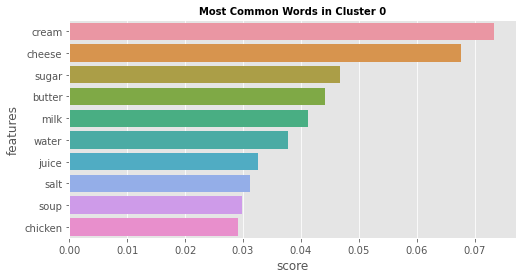

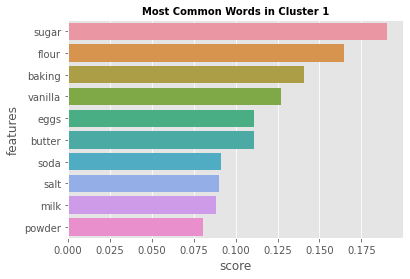

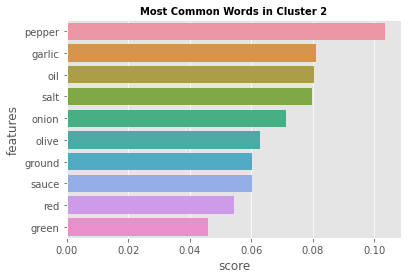

In [253]:
best_result = 3
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 10)

In [262]:
pip install wordcloud


  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Owner\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Owner\\AppData\\Local\\Temp\\pip-install-fdarvtgc\\wordcloud_581b6131f2e74b9cbaa0d6810f7445e4\\setup.py'"'"'; __file__='"'"'C:\\Users\\Owner\\AppData\\Local\\Temp\\pip-install-fdarvtgc\\wordcloud_581b6131f2e74b9cbaa0d6810f7445e4\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Owner\AppData\Local\Temp\pip-wheel-e68de_og'
       cwd: C:\Users\Owner\AppData\Local\Temp\pip-install-fdarvtgc\wordcloud_581b6131f2e74b9cbaa0d6810f7445e4\
  Complete output (26 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9

In [263]:
from wordcloud                        import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [254]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

In [255]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

NameError: name 'WordCloud' is not defined